In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plot_folder = "plots/data_distribution/N4/"

In [21]:
dfucb = [
    pd.read_table("params/N4/simulation_params_N4C0.0.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.01.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.05.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.08.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.1.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.3.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.5.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.7.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C1.0.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_180767/3006441746.py:2: SyntaxWarning: invalid escape sequence '\s'
  pd.read_table

In [22]:
dfucb[0]

,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,0.250173,0.250000,0.125022,0.124935,0.25,0.0,0.5,0.50,0.810872,-2.341407e-11,0.0
1,0.125065,0.216619,0.062500,0.108253,0.25,0.0,0.5,0.25,0.405233,-2.704300e-08,0.0
2,0.250087,0.433163,0.062500,0.108253,0.00,0.0,1.0,0.00,0.810872,-5.408600e-08,0.0
3,0.250087,0.433163,0.062500,0.108253,0.00,0.0,1.0,0.00,0.810872,-5.408600e-08,0.0
4,0.374762,0.414297,0.093755,0.103646,0.25,0.0,0.5,0.25,0.905233,9.885408e-08,0.5
...,...,...,...,...,...,...,...,...,...,...,...
596,0.500173,0.500173,0.125000,0.125000,0.00,0.0,1.0,0.00,0.999500,-6.245313e-08,1.0
597,0.375152,0.414728,0.093755,0.103646,0.25,0.0,0.5,0.25,0.905139,-5.178340e-08,0.5
598,-0.000087,0.000287,-0.062500,0.207289,0.00,0.0,1.0,0.00,0.000000,-1.035668e-07,0.0
599,0.124978,0.216469,0.062500,0.108253,0.25,0.0,0.5,0.25,0.405233,2.693479e-08,0.0


In [23]:
#for d in df:
#    d['efficiency'].describe()

In [24]:
Cs = [0,0.01,0.05,0.08,0.1,0.3,0.5,0.7,1.0]

In [25]:
#To bypass a bug in _define_bin_edges, _statistics.py, that generates an error in bins 
if dfucb[0]['cond_entropy'].sum() == 0:
    dfucb[0].loc[0,'cond_entropy'] = 1.e-1
#dfucb[0]

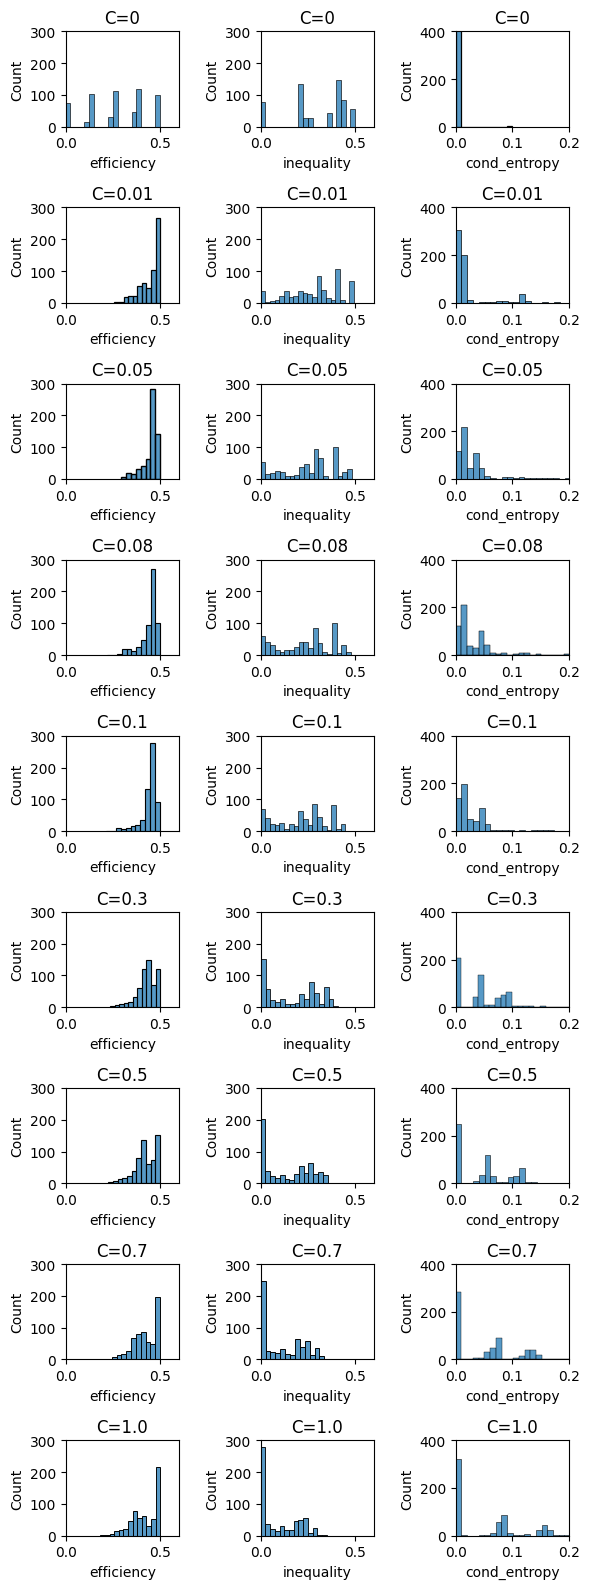

In [26]:
nr = len(dfucb)
nc = 3
fig0, ax = plt.subplots(nrows=nr,ncols=nc,figsize=(6,16))
for i in range(0,nr):
    pa = sns.histplot(data=dfucb[i], ax=ax[i,0], x='efficiency', binwidth=0.025)
    pb = sns.histplot(data=dfucb[i], ax=ax[i,1], x='inequality', binwidth=0.025)
    pc = sns.histplot(data=dfucb[i], ax=ax[i,2], x='cond_entropy', binwidth=0.01)
    pa.set_title('C='+str(Cs[i]))
    pb.set_title('C='+str(Cs[i]))
    pc.set_title('C='+str(Cs[i]))
    pa.set_xlim(0,0.6)
    pa.set_ylim(0,300)
    pb.set_xlim(0,0.6)
    pb.set_ylim(0,300)
    pc.set_xlim(0,0.2)
    pc.set_ylim(0,400)
plt.tight_layout()
plt.savefig(plot_folder+'histograms.png')

In [28]:
#cvals = [0,0.2] 
#eff_means = [d.efficiency.mean() for d in dfucb]
#inq_means = [d.inequality.mean() for d in dfucb]
#plt.plot(cvals,eff_means)
#plt.plot(cvals,inq_means)